## ChatGPT Face Detector
Below are two programs about face recognition obtained from ChatGPT using various techniques of machine learning. 

### Background Context
##### K-Nearest Neighbors (KNN)
A popular supervised machine learning algorithm used in regression and classification. The model prediction is based on the similarities between the unseen data from the test set and its k nearest neighbors in the training set.<br>
- **Advantage:** simple and easy to implement <br>
- **Disadvantage:** lazy learner (train while making prediction) so slower and more costly (memory)

##### Convolutional Neural Network (CNN)
A type of deep learning neural network architecture used for image and speech processing. By using multiple interconnected layers, they can extract useful features from the input data and use them to make predictions<br>
- **Advantage:** multiple layers enable capture and recognize variations of data<br>
- **Disadvantage:** high complexity (expensive to train and use)<br>

### About the Dataset
The file contains two set of data: training and testing in the `train` and `val` folders respectively. Each of them contains two set of randomly chosen images displaying two different type of facial expressions: happy and sad. 

Data size: 
|  | train | test |
| --- | --- | --- |
| happy men | 25 | 5 |
| happy women | 25 | 5 |
| sad men | 25 | 5 |
| sad women | 25 | 5 |

[Image Source](https://stock.adobe.com/)

### Your tasks: 
KNN Model:
- Explain what does `Accuracy` tells you.
- Compute `precision` and `recall` and explain what they mean.
<br>

CNN Model:
- Train the model with the given dataset. What could do potentially improves `accuracy` of the model?
- Explain what does `loss` and `accuracy` tells you.
- Compute TP, TN, FP, FN
- Compute Precision and Recall
- How much of the True Positive were Male? Female?
- How much of the True Negative were Male? Female?
- Create a bar chart to show these proportion in terms of percentage.

### Format:
- For questions that require justification, include all your answers in a (one) Markdown cell after each program.
- For questions that require programming output, make sure it's clear what each output is. 

In [23]:
#use KNN
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Load the LFW dataset
# downloads and returns the images of people's face and labels
# only include people with at least 70 images in the dataset
lfw = datasets.fetch_lfw_people(min_faces_per_person=70)

print(lfw)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(lfw.data, lfw.target, test_size=0.2, random_state=42)

# Train a K-Nearest Neighbors classifier
# n_neighbors: use the 5 nearest neighbors to make the predictions
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
# comparing the predicted labels (y_pred) with the true labels (y_test)
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the classifier
print("\nAccuracy:", accuracy)

# accuracy gives the proportion of accurately predicted sample from the total number of sample
# the closer to 1 the better

{'data': array([[0.99477124, 0.99607843, 0.99477124, ..., 0.38169935, 0.38562092,
        0.38169935],
       [0.14771242, 0.16078432, 0.21437909, ..., 0.44836605, 0.45098042,
        0.58300656],
       [0.34117648, 0.3503268 , 0.4366013 , ..., 0.7176471 , 0.72156864,
        0.7163399 ],
       ...,
       [0.35816994, 0.3503268 , 0.31895426, ..., 0.21568628, 0.21568628,
        0.17777778],
       [0.19346406, 0.21045752, 0.29150328, ..., 0.6875817 , 0.6575164 ,
        0.5908497 ],
       [0.12418301, 0.09673203, 0.10849673, ..., 0.12941177, 0.16209151,
        0.29150328]], dtype=float32), 'images': array([[[0.99477124, 0.99607843, 0.99477124, ..., 0.26797387,
         0.23137255, 0.20130719],
        [0.9973857 , 0.9973857 , 0.99607843, ..., 0.275817  ,
         0.24052288, 0.20915033],
        [0.98692805, 0.9751634 , 0.96732026, ..., 0.27058825,
         0.24183007, 0.21960784],
        ...,
        [0.33594772, 0.2771242 , 0.20522876, ..., 0.41045752,
         0.39869282, 0.37

In [2]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
print("Recall:", recall)


Precision: 0.5765068085804519
Recall: 0.5813953488372093


Accuracy is the ratio of correctly predicted samples to the total samples. The closer the accuracy is to 1, the better the model performs.

Precision and recall are two metrics used to evaluate the performance of a classifier. Precision is the ratio of true positive predictions to the sum of true positive and false positive predictions. It represents the proportion of positive instances that are correctly identified by the model. Recall, on the other hand, is the ratio of true positive predictions to the sum of true positive and false negative predictions.It represents the proportion of actual positive instances that the model has correctly identified.

In [18]:
#use CNN
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory paths for the training and validation datasets
train_dir = 'train'
val_dir = 'val'

# Define the number of classes (happy and sad)
num_classes = 2

# Define the input shape of the images
input_shape = (160, 160, 1)

# Define the batch size for the data generators
batch_size = 5

# Define the data generators for the training and validation datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    classes=['happy', 'sad']
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    classes=['happy', 'sad']
)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples//batch_size
)

# Save the model
model.save('face_classification_model.h5')

y_pred = model.predict(train_generator)
y_true = train_generator.classes

# Convert predicted labels to binary values (e.g., using a threshold)
y_pred_binary = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix for training set:")
print(cm)

# Extract TP, TN, FP, FN from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print the results
print("\nTrue Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


y_pred = model.predict(val_generator)
y_true = val_generator.classes

# Convert predicted labels to binary values (e.g., using a threshold)
y_pred_binary = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix for test set:")
print(cm)

# Extract TP, TN, FP, FN from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print the results
print("\nTrue Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

train_precision = precision_score(y_true, y_pred_binary)
train_recall = recall_score(y_true, y_pred_binary)

print("\nPrecision for training set:", train_precision)
print("Recall for training set:", train_recall)

val_precision = precision_score(y_true, y_pred_binary)
val_recall = recall_score(y_true, y_pred_binary)

print("Precision for validation set:", val_precision)
print("Recall for validation set:", val_recall)


Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
20/20 [==============================] - 3s 109ms/step - loss: 0.7682 - accuracy: 0.4500 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 2s 106ms/step - loss: 0.6945 - accuracy: 0.3300 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
20/20 [==============================] - 2s 108ms/step - loss: 0.6957 - accuracy: 0.5000 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 4/10
20/20 [==============================] - 2s 111ms/step - loss: 0.6896 - accuracy: 0.4900 - val_loss: 0.6816 - val_accuracy: 0.3500
Epoch 5/10
20/20 [==============================] - 2s 114ms/step - loss: 0.6645 - accuracy: 0.5300 - val_loss: 0.6742 - val_accuracy: 0.4000
Epoch 6/10
20/20 [==============================] - 2s 115ms/step - loss: 0.6499 - accuracy: 0.6200 - val_loss: 0.7010 - val_accuracy: 0.5500
Epoch 7/10
20/20 [==============================] - 2s 116ms/step -

In [16]:
#for male
train_dir = 'train_male'
val_dir = 'val_male'

# Define the number of classes (happy and sad)
num_classes = 2

# Define the input shape of the images
input_shape = (160, 160, 1)

# Define the batch size for the data generators
batch_size = 5

# Define the data generators for the training and validation datasets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    classes=['happy', 'sad']
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    classes=['happy', 'sad']
)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples//batch_size
)

# Save the model
model.save('face_classification_model_male.h5')

y_pred = model.predict(train_generator)
y_true = train_generator.classes

# Convert predicted labels to binary values (e.g., using a threshold)
y_pred_binary = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix for training set:")
print(cm)

# Extract TP, TN, FP, FN from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print the results
print("\nTrue Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


y_pred = model.predict(val_generator)
y_true = val_generator.classes

# Convert predicted labels to binary values (e.g., using a threshold)
y_pred_binary = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix for test set:")
print(cm)

# Extract TP, TN, FP, FN from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Print the results
print("\nTrue Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

print("\nTrue Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

train_precision = precision_score(y_true, y_pred_binary)
train_recall = recall_score(y_true, y_pred_binary)

print("\nPrecision for training set:", train_precision)
print("Recall for training set:", train_recall)

val_precision = precision_score(y_true, y_pred_binary)
val_recall = recall_score(y_true, y_pred_binary)

print("Precision for validation set:", val_precision)
print("Recall for validation set:", val_recall)

Found 50 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 2s 137ms/step - loss: 1.8402 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.3000
Epoch 2/10
10/10 [==============================] - 1s 116ms/step - loss: 0.6913 - accuracy: 0.6000 - val_loss: 0.6957 - val_accuracy: 0.3000
Epoch 3/10
10/10 [==============================] - 1s 114ms/step - loss: 0.6870 - accuracy: 0.4800 - val_loss: 0.7046 - val_accuracy: 0.3000
Epoch 4/10
10/10 [==============================] - 1s 122ms/step - loss: 0.6515 - accuracy: 0.5800 - val_loss: 0.8188 - val_accuracy: 0.4000
Epoch 5/10
10/10 [==============================] - 1s 124ms/step - loss: 0.6163 - accuracy: 0.6200 - val_loss: 0.7264 - val_accuracy: 0.3000
Epoch 6/10
10/10 [==============================] - 1s 120ms/step - loss: 0.5916 - accuracy: 0.6600 - val_loss: 0.8964 - val_accuracy: 0.3000
Epoch 7/10
10/10 [==============================] - 1s 117ms/step - 

In [17]:
#for female
train_dir = 'train_female'
val_dir = 'val_female'

num_classes = 2

input_shape = (160, 160, 1)

batch_size = 5

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    classes=['happy', 'sad']
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    classes=['happy', 'sad']
)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples//batch_size
)

model.save('face_classification_model_female.h5')


y_pred = model.predict(train_generator)
y_true = train_generator.classes

y_pred_binary = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_binary)

print("Confusion Matrix for training set:")
print(cm)

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print("\nTrue Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


y_pred = model.predict(val_generator)
y_true = val_generator.classes

y_pred_binary = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred_binary)

print("Confusion Matrix for test set:")
print(cm)

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

print("\nTrue Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

print("\nTrue Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

train_precision = precision_score(y_true, y_pred_binary)
train_recall = recall_score(y_true, y_pred_binary)

print("\nPrecision for training set:", train_precision)
print("Recall for training set:", train_recall)

val_precision = precision_score(y_true, y_pred_binary)
val_recall = recall_score(y_true, y_pred_binary)

print("Precision for validation set:", val_precision)
print("Recall for validation set:", val_recall)

Found 50 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Epoch 1/10
10/10 [==============================] - 2s 137ms/step - loss: 1.6972 - accuracy: 0.3200 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 1s 122ms/step - loss: 0.6954 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 1s 119ms/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 1s 120ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 1s 127ms/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 1s 125ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 7/10
10/10 [==============================] - 1s 122ms/step - 

Accuracy Improve: 
Data augmentation: Apply transformations to increase data diversity.
Increase model complexity: Add more layers or filters.
Regularization: Use dropout or L1/L2 regularization to reduce overfitting.
Fine-tuning: Use pre-trained models and adapt them for your problem.
Hyperparameter tuning: Optimize learning rate, batch size, etc.
Early stopping: Stop training when validation performance plateaus.
Increase dataset size: Collect more labeled data.
Preprocessing: Normalize input data or apply other techniques.

Loss: The difference between the model's predictions and true labels. Lower loss indicates better performance.
Accuracy: The percentage of correct predictions made by the model. Higher accuracy means better predictions. Not ideal for imbalanced datasets.

True Positive_Train M:13 F:13
True Negtive_Train  M:15 F:20
True Positive_Val M:0 F:2
True Negtive_Val M:4 F:4
True Positive_Total M:13 F:15
True Negtive_Total M:19 F:24

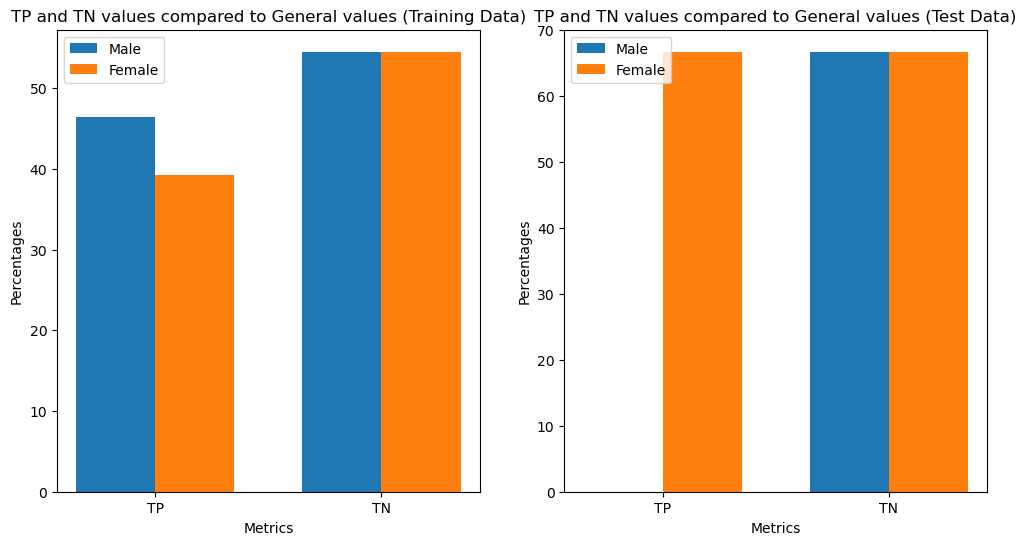

In [33]:

TP_male = [13, 0]
TP_female = [11, 2]
TP_general = [28, 3]

TN_male = [24, 4]
TN_female = [24, 4]
TN_general = [44, 6]

TP_male_percentage = [TP_male[0] / TP_general[0] * 100, TP_male[1] / TP_general[1] * 100]
TP_female_percentage = [TP_female[0] / TP_general[0] * 100, TP_female[1] / TP_general[1] * 100]
TN_male_percentage = [TN_male[0] / TN_general[0] * 100, TN_male[1] / TN_general[1] * 100]
TN_female_percentage = [TN_female[0] / TN_general[0] * 100, TN_female[1] / TN_general[1] * 100]

datasets = ['Training', 'Test']
metrics = ['TP', 'TN']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, dataset in enumerate(datasets):
    ax = axes[i]

    proportions_male = [TP_male_percentage[i], TN_male_percentage[i]]
    proportions_female = [TP_female_percentage[i], TN_female_percentage[i]]

    x = np.arange(len(metrics))
    bar_width = 0.35

    ax.bar(x - bar_width/2, proportions_male, bar_width, label='Male')
    ax.bar(x + bar_width/2, proportions_female, bar_width, label='Female')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Percentages')
    ax.set_title(f'TP and TN values compared to General values ({dataset} Data)')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()
    
plt.show()

**Accuracy:** Proportion of correct prediction out of total prediction of the training/testing data.
- The higher the better
<br>

**Loss:** Measures the difference between the predicted and true output of the training/testing data. 
- The lower the better